In [2]:
import open3d as o3d
import numpy as np

orig_strawberry_points = []

strawberry_model_pcd = 'strawberry_fruit_sampled.xyz'
with open(strawberry_model_pcd, 'r') as file:
    for line in file:
        x_str, y_str, z_str = line.strip().split()
        orig_strawberry_points.append((float(x_str), float(y_str), float(z_str)))

# Convert to numpy array for processing
orig_strawberry_points = np.array(orig_strawberry_points)
print("orig_strawberry_points", orig_strawberry_points.shape)

# Convert to Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(orig_strawberry_points)

# Set all points to blue
pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (orig_strawberry_points.shape[0], 1)))

o3d.visualization.draw_geometries([pcd])


orig_strawberry_points (1024, 3)


i want  some kind of interactive GUI to move the strawberry model strawberry_fruit_sampled.xyz to overlap it with the partial pointcloud. Then save the transformation matrix and the transformed model
let the code provide an initial guess for the transformation as it transforms the strawberry model, then I want to edit it to make it better, then give me an option to save the transformation matrix and the transformed model


In [4]:
import tkinter as tk
import numpy as np
import open3d as o3d

# Save original strawberry model points for transformation reference
orig_points = np.asarray(pcd.points).copy()

def apply_transformation():
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())
    
    # Compute rotation matrix from Euler angles
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    
    # Apply transformation to original points
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_temp = o3d.geometry.PointCloud()
    pcd_temp.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_temp.colors = pcd.colors  # keep same color (blue)

    partial_pcd = o3d.io.read_point_cloud("segmented_0010_0.ply")
    
    o3d.visualization.draw_geometries([pcd_temp, partial_pcd])
    
    # Save the transformation matrix globally so it can be saved later
    global transformation
    transformation = T
    print("Applied transformation:\n", T)

def save_transformation():
    np.save("transformation_matrix.npy", transformation)
    pcd_save = o3d.geometry.PointCloud()
    # Apply transformation to get transformed points
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = pcd.colors
    o3d.io.write_point_cloud("transformed_strawberry_model.ply", pcd_save)
    print("Transformation matrix and transformed model saved.")

# Create a tkinter GUI window with sliders to adjust transformation parameters
root = tk.Tk()
root.title("Strawberry Transformation")

# Translation sliders
tk.Label(root, text="Translation X").pack()
slider_tx = tk.Scale(root, from_=-1, to=1, resolution=0.01, orient=tk.HORIZONTAL)
slider_tx.pack()
tk.Label(root, text="Translation Y").pack()
slider_ty = tk.Scale(root, from_=-1, to=1, resolution=0.01, orient=tk.HORIZONTAL)
slider_ty.pack()
tk.Label(root, text="Translation Z").pack()
slider_tz = tk.Scale(root, from_=-1, to=1, resolution=0.01, orient=tk.HORIZONTAL)
slider_tz.pack()

# Rotation sliders (in degrees)
tk.Label(root, text="Rotation X (degrees)").pack()
slider_rx = tk.Scale(root, from_=-180, to=180, orient=tk.HORIZONTAL)
slider_rx.pack()
tk.Label(root, text="Rotation Y (degrees)").pack()
slider_ry = tk.Scale(root, from_=-180, to=180, orient=tk.HORIZONTAL)
slider_ry.pack()
tk.Label(root, text="Rotation Z (degrees)").pack()
slider_rz = tk.Scale(root, from_=-180, to=180, orient=tk.HORIZONTAL)
slider_rz.pack()

btn_apply = tk.Button(root, text="Apply Transformation", command=apply_transformation)
btn_apply.pack(pady=5)

btn_save = tk.Button(root, text="Save Transformation", command=save_transformation)
btn_save.pack(pady=5)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\envs\realsense\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_20652\1390780269.py", line 38, in save_transformation
    np.save("transformation_matrix.npy", transformation)
NameError: name 'transformation' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\envs\realsense\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_20652\1390780269.py", line 38, in save_transformation
    np.save("transformation_matrix.npy", transformation)
NameError: name 'transformation' is not defined


[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
Applied transformation:
 [[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16  0.0000000e+00]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]
Applied transformation:
 [[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16  0.0000000e+00]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]
Applied transformation:
 [[-1.00000000e+00 -1.22464680e-16  0.00000000e+00  0.00000000e+00]
 [-1.22464680e-16  1.00000000e+00 -1.22464680e-16  0.00000000e+00]
 [ 1.49975978e-32 -1.22464680e-16 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


calculate the centroid of the partial pointcloud and make the initial transformation of the strawberry model be to the centroid, then I will be adjusting it myself with all the tkinter sliders


Color the model red and partial pointclouds blue. Calculate the centroid of the partial pointcloud then give an option in the GUI to transform the strawberry model to the partial pointcloud's centroid

In [ ]:
import tkinter as tk
import numpy as np
import open3d as o3d

# Set the strawberry model color to red
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (np.asarray(pcd.points).shape[0], 1)))
# Save original strawberry model points for future transformations
orig_points = np.asarray(pcd.points).copy()

# Load the partial pointcloud and color it blue
partial_pcd = o3d.io.read_point_cloud("segmented_0010_0.ply")
partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))

# Create a coordinate frame
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

def apply_transformation():
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())
    
    # Compute rotation matrix from Euler angles
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    
    # Apply transformation to original points
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_temp = o3d.geometry.PointCloud()
    pcd_temp.points = o3d.utility.Vector3dVector(transformed_points)
    # Color the transformed strawberry model red
    pcd_temp.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    
    o3d.visualization.draw_geometries([pcd_temp, partial_pcd, coordinate_frame])
    
    global transformation
    transformation = T
    print("Applied transformation:\n", T)

def move_to_centroid():
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")

def save_transformation():
    np.save("transformation_matrix.npy", transformation)
    pcd_save = o3d.geometry.PointCloud()
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    o3d.io.write_point_cloud("transformed_strawberry_model.ply", pcd_save)
    print("Transformation matrix and transformed model saved.")

# Create the tkinter GUI window
root = tk.Tk()
root.title("Strawberry Transformation")

# Helper function to create a slider frame with minus and plus buttons
def create_slider_frame(parent, label_text, slider_from, slider_to, resolution, orient=tk.HORIZONTAL):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution, orient=orient, length=200)
    slider.pack(side=tk.LEFT)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider

# Translation sliders with + and - buttons
slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.01)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.01)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.01)

# Rotation sliders (in degrees) with + and - buttons
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 1)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 1)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 1)

# Buttons for applying transformation, aligning to centroid and saving result
btn_apply = tk.Button(root, text="Apply Transformation", command=apply_transformation)
btn_apply.pack(pady=5)

btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)

btn_save = tk.Button(root, text="Save Transformation", command=save_transformation)
btn_save.pack(pady=5)

root.mainloop()


Applied transformation:
 [[1.   0.   0.   0.07]
 [0.   1.   0.   0.1 ]
 [0.   0.   1.   0.43]
 [0.   0.   0.   1.  ]]
Moved strawberry model to partial pointcloud's centroid.
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  7.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  1.000000e-01]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  4.300000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


can u make the gui where the strawberry models show be interactive: that is as I move the sliders values I see the strawberry moving instead of having to reopen the gui everytime



In [ ]:
import tkinter as tk
import numpy as np
import open3d as o3d

# Assume pcd is already loaded (the full strawberry model)
# Set the strawberry model color to red and copy its original points
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (np.asarray(pcd.points).shape[0], 1)))
orig_points = np.asarray(pcd.points).copy()

# Load the partial pointcloud and color it blue
partial_pcd = o3d.io.read_point_cloud("segmented_0010_0.ply")
partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))

# Create a coordinate frame
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

# Create a persistent pointcloud for display (initially same as original)
pcd_display = o3d.geometry.PointCloud()
pcd_display.points = o3d.utility.Vector3dVector(orig_points)
pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (orig_points.shape[0], 1)))

# Create an Open3D Visualizer window and add geometries
vis = o3d.visualization.Visualizer()
vis.create_window("Visualizer", width=600, height=600)
vis.add_geometry(pcd_display)
vis.add_geometry(partial_pcd)
vis.add_geometry(coordinate_frame)

# Global variable for the transformation matrix
transformation = np.eye(4)

def apply_transformation():
    global transformation, pcd_display
    # Get slider values
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())

    # Compute rotation matrix from Euler angles
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    transformation = T

    # Apply transformation to original points and update display geometry
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    vis.update_geometry(pcd_display)
    # Optionally print transformation
    print("Applied transformation:\n", T)

def move_to_centroid():
    global transformation
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")

def save_transformation():
    # Save transformation and transformed model
    np.save("transformation_matrix.npy", transformation)
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save = o3d.geometry.PointCloud()
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    o3d.io.write_point_cloud("transformed_strawberry_model.ply", pcd_save)
    print("Transformation matrix and transformed model saved.")

# Update the Open3D visualizer periodically.
def update_visualizer():
    vis.poll_events()
    vis.update_renderer()
    root.after(50, update_visualizer)

# Helper function to create a slider frame with minus and plus buttons.
# The slider callback is set so that any change updates the transformation.
def create_slider_frame(parent, label_text, slider_from, slider_to, resolution):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    # Define slider with command callback for interactivity.
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution,
                      orient=tk.HORIZONTAL, length=200, command=lambda x: apply_transformation())
    slider.pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider

# Create the tkinter GUI window
root = tk.Tk()
root.title("Strawberry Transformation")

# Create translation sliders
slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.01)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.01)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.01)

# Create rotation sliders (in degrees)
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 1)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 1)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 1)

# Buttons for moving to centroid and saving result.
btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)

btn_save = tk.Button(root, text="Save Transformation", command=save_transformation)
btn_save.pack(pady=5)

# Start visualizer update loop
root.after(50, update_visualizer)
# Start the tkinter GUI loop
root.mainloop()


[Open3D WARNING] Read PLY failed: unable to open file: segmented_0010_0.ply
[Open3D WARNING] The number of points is 0 when creating axis-aligned bounding box.
Applied transformation:
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.99939083 -0.0348995   0.        ]
 [ 0.          0.0348995   0.99939083  0.        ]
 [ 0.          0.          0.          1.        ]]
Applied transformation:
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.98768834 -0.15643447  0.        ]
 [ 0.          0.15643447  0.98768834  0.        ]
 [ 0.          0.          0.          1.        ]]
Applied transformation:
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.94551858 -0.32556815  0.        ]
 [ 0.          0.32556815  0.94551858  0.        ]
 [ 0.          0.          0.          1.        ]]
Applied transformation:
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.93358043 -0.35836795  0.        ]
 [ 0.          0.358367

: 

instead of only segmented_0010_0.ply, make this code loop through all the files in segmented_pointcloud_separated2 as the partial pointclouds, and save the final transformed transformation_matrix_{}.npy and transformation_strawberry_model_{}.ply with the same number of each file in the segmented_pointcloud_separated2 folder segmented_00xx_x.ply

In [1]:
import os
import glob
import tkinter as tk
import numpy as np
import open3d as o3d


orig_strawberry_points = []

strawberry_model_pcd = 'strawberry_fruit_sampled.xyz'
with open(strawberry_model_pcd, 'r') as file:
    for line in file:
        x_str, y_str, z_str = line.strip().split()
        orig_strawberry_points.append((float(x_str), float(y_str), float(z_str)))

# Convert to numpy array for processing
orig_strawberry_points = np.array(orig_strawberry_points)
print("orig_strawberry_points", orig_strawberry_points.shape)

# Convert to Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(orig_strawberry_points)





# Assume pcd is already loaded (the full strawberry model)
# Set the strawberry model color to red and copy its original points
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (np.asarray(pcd.points).shape[0], 1)))
orig_points = np.asarray(pcd.points).copy()

# Load an initial partial pointcloud (will be replaced later)
partial_pcd = o3d.io.read_point_cloud("segmented_pointcloud_separated2/segmented_0000_0.ply")
partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))

# Create a coordinate frame
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

# Create a persistent pointcloud for display (initially same as original)
pcd_display = o3d.geometry.PointCloud()
pcd_display.points = o3d.utility.Vector3dVector(orig_points)
pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (orig_points.shape[0], 1)))

# Create an Open3D Visualizer window and add geometries
vis = o3d.visualization.Visualizer()
vis.create_window("Visualizer", width=600, height=600)
vis.add_geometry(pcd_display)
vis.add_geometry(partial_pcd)
vis.add_geometry(coordinate_frame)

# Global variable for the transformation matrix
transformation = np.eye(4)

def apply_transformation():
    global transformation, pcd_display
    # Get slider values
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())

    # Compute rotation matrix from Euler angles
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    transformation = T

    # Apply transformation to original points and update display geometry
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    vis.update_geometry(pcd_display)
    print("Applied transformation:\n", T)

def move_to_centroid():
    global transformation
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")

def save_transformation(identifier):
    # Save transformation and transformed model with the given identifier.
    np.save(f"transformation_matrix/transformation_matrix_{identifier}.npy", transformation)
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save = o3d.geometry.PointCloud()
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    o3d.io.write_point_cloud(f"transformation_strawberry_model/transformation_strawberry_model_{identifier}.ply", pcd_save)
    print("Saved transformation matrix and model for", identifier)

def process_all():
    folder = "segmented_pointcloud_separated2"
    pattern = os.path.join(folder, "segmented_*.ply")
    files = sorted(glob.glob(pattern))
    for filepath in files:
        print("Processing", filepath)
        # Load the partial pointcloud from current file
        current_partial_pcd = o3d.io.read_point_cloud(filepath)
        current_points = np.asarray(current_partial_pcd.points)
        current_partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (current_points.shape[0], 1)))
        
        # Update the global partial_points for centroid computation
        global partial_points, partial_pcd
        partial_points = current_points
        
        # Remove previous partial if it exists, then add the new one.
        try:
            vis.remove_geometry(partial_pcd)
        except:
            pass
        partial_pcd = current_partial_pcd
        vis.add_geometry(partial_pcd)
        
        # Compute centroid translation and update sliders
        strawberry_centroid = np.mean(orig_points, axis=0)
        partial_centroid = np.mean(partial_points, axis=0)
        translation = partial_centroid - strawberry_centroid
        slider_tx.set(translation[0])
        slider_ty.set(translation[1])
        slider_tz.set(translation[2])
        # (Optional: Reset rotations if desired)
        slider_rx.set(0)
        slider_ry.set(0)
        slider_rz.set(0)
        apply_transformation()
        
        # Use part of the filename (e.g., segmented_0010_0) as an identifier
        identifier = os.path.splitext(os.path.basename(filepath))[0]
        save_transformation(identifier)
        vis.poll_events()  # Allow visualizer update between files

# Update the Open3D visualizer periodically.
def update_visualizer():
    vis.poll_events()
    vis.update_renderer()
    root.after(50, update_visualizer)

# Helper function to create a slider frame with minus and plus buttons.
def create_slider_frame(parent, label_text, slider_from, slider_to, resolution):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution,
                      orient=tk.HORIZONTAL, length=200, command=lambda x: apply_transformation())
    slider.pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider

# Create the tkinter GUI window
root = tk.Tk()
root.title("Strawberry Transformation")

# Create translation sliders
slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.01)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.01)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.01)

# Create rotation sliders (in degrees)
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 1)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 1)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 1)

# Buttons for moving to centroid, saving result, and processing all partials.
btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)

btn_save = tk.Button(root, text="Save Transformation", command=lambda: save_transformation("manual"))
btn_save.pack(pady=5)

btn_process_all = tk.Button(root, text="Process All Partials", command=process_all)
btn_process_all.pack(pady=5)

# Start visualizer update loop
root.after(50, update_visualizer)
# Start the tkinter GUI loop
root.mainloop()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
orig_strawberry_points (1024, 3)


Write the name of the partial pointcloud as the title of the ooen3d and give me an option in gui to go to the next pointcloud, also save the transformation with the name of the file

In [ ]:
import os
import glob
import tkinter as tk
import numpy as np
import open3d as o3d

# (Keep existing code to load strawberry model, orig_points, etc.)

orig_strawberry_points = []
strawberry_model_pcd = 'strawberry_fruit_sampled.xyz'
with open(strawberry_model_pcd, 'r') as file:
    for line in file:
        x_str, y_str, z_str = line.strip().split()
        orig_strawberry_points.append((float(x_str), float(y_str), float(z_str)))

orig_strawberry_points = np.array(orig_strawberry_points)
print("orig_strawberry_points", orig_strawberry_points.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(orig_strawberry_points)

# Set model color to red and copy points
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (len(orig_strawberry_points), 1)))
orig_points = np.asarray(pcd.points).copy()

# Load an initial partial point cloud
partial_pcd = o3d.io.read_point_cloud("segmented_pointcloud_separated2/segmented_0000_0.ply")
partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))

coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

pcd_display = o3d.geometry.PointCloud()
pcd_display.points = o3d.utility.Vector3dVector(orig_points)
pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (orig_points.shape[0], 1)))

# Create a global visualizer (initial title will be used for the first partial)
vis = o3d.visualization.Visualizer()
vis.create_window("Visualizer - segmented_0000_0", width=600, height=600)
vis.add_geometry(pcd_display)
vis.add_geometry(partial_pcd)
vis.add_geometry(coordinate_frame)

transformation = np.eye(4)

def apply_transformation():
    global transformation, pcd_display
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    transformation = T
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    vis.update_geometry(pcd_display)
    print("Applied transformation:\n", T)

def move_to_centroid():
    global transformation
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)  # Set rotation around x-axis to 90 degreest rotation around x-axis to 90 degrees

    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")

def save_transformation(identifier):
    np.save(f"transformation_matrix/transformation_matrix_{identifier}.npy", transformation)
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save = o3d.geometry.PointCloud()
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    o3d.io.write_point_cloud(f"transformation_strawberry_model/transformation_strawberry_model_{identifier}.ply", pcd_save)
    print("Saved transformation matrix and model for", identifier)

# Process All function remains unchanged
def process_all():
    folder = "segmented_pointcloud_separated2"
    pattern = os.path.join(folder, "segmented_*.ply")
    files = sorted(glob.glob(pattern))
    for filepath in files:
        print("Processing", filepath)
        current_partial_pcd = o3d.io.read_point_cloud(filepath)
        current_points = np.asarray(current_partial_pcd.points)
        current_partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (current_points.shape[0], 1)))
        global partial_points, partial_pcd
        partial_points = current_points
        try:
            vis.remove_geometry(partial_pcd)
        except:
            pass
        partial_pcd = current_partial_pcd
        vis.add_geometry(partial_pcd)
        strawberry_centroid = np.mean(orig_points, axis=0)
        partial_centroid = np.mean(partial_points, axis=0)
        translation = partial_centroid - strawberry_centroid
        slider_tx.set(translation[0])
        slider_ty.set(translation[1])
        slider_tz.set(translation[2])
        slider_rx.set(90)
        slider_ry.set(0)
        slider_rz.set(0)
        apply_transformation()
        
        identifier = os.path.splitext(os.path.basename(filepath))[0] 
        # identifier = os.path.basename(filename)

        save_transformation(identifier)
        vis.poll_events()

# Create a sorted list of partial pointcloud files and an index for going to the next partial.
partial_files = sorted(glob.glob(os.path.join("segmented_pointcloud_separated2", "segmented_*.ply")))
partial_index = 1   # Since the first file is already loaded

def next_partial():
    global partial_files, partial_index, partial_pcd, partial_points, vis
    if partial_index >= len(partial_files):
        print("No more partial pointclouds.")
        return
    filename = partial_files[partial_index]
    partial_index += 1
    print("Loading", filename)
    # Read the new partial
    new_partial = o3d.io.read_point_cloud(filename)
    new_partial_points = np.asarray(new_partial.points)
    new_partial.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (new_partial_points.shape[0], 1)))
    partial_points = new_partial_points
    try:
        vis.remove_geometry(partial_pcd)
    except:
        pass
    partial_pcd = new_partial
    # Update sliders so that the strawberry model is centered on the partial
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)
    slider_ry.set(0)
    slider_rz.set(0)
    apply_transformation()
    # Re-create the visualizer window with the new title (the title now shows the partial file name)
    new_title = f"Visualizer - {os.path.basename(filename)}"

    vis.destroy_window()
    vis.create_window(new_title, width=600, height=600)
    vis.add_geometry(pcd_display)
    vis.add_geometry(partial_pcd)
    vis.add_geometry(coordinate_frame)
    print("Updated visualizer with new title.")

def update_visualizer():
    vis.poll_events()
    vis.update_renderer()
    root.after(50, update_visualizer)

def create_slider_frame(parent, label_text, slider_from, slider_to, resolution):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution,
                      orient=tk.HORIZONTAL, length=200, command=lambda x: apply_transformation())
    slider.pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider

root = tk.Tk()
root.title("Strawberry Transformation")

slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.01)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.01)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.01)
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 1)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 1)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 1)

btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)
btn_save = tk.Button(root, text="Save Transformation", command=lambda: save_transformation(os.path.basename(partial_files[partial_index])))
btn_save.pack(pady=5)
btn_process_all = tk.Button(root, text="Process All Partials", command=process_all)
btn_process_all.pack(pady=5)

# New button to go to the next partial pointcloud
btn_next = tk.Button(root, text="Next Partial", command=next_partial)
btn_next.pack(pady=5)

root.after(50, update_visualizer)
root.mainloop()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
orig_strawberry_points (1024, 3)
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  5.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  7.900000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Moved strawberry model to partial pointcloud's centroid.
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  5.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  7.900000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  5.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  7.900000e-01]
 [ 0.000000e+00

make the open3d window always launch on the right of the screen and take up half of the screen instead of being a small window

In [ ]:
import os
import glob
import tkinter as tk
import numpy as np
import open3d as o3d

# (Keep existing code to load strawberry model, orig_points, etc.)

orig_strawberry_points = []
strawberry_model_pcd = 'strawberry_fruit_sampled.xyz'
with open(strawberry_model_pcd, 'r') as file:
    for line in file:
        x_str, y_str, z_str = line.strip().split()
        orig_strawberry_points.append((float(x_str), float(y_str), float(z_str)))

orig_strawberry_points = np.array(orig_strawberry_points)
print("orig_strawberry_points", orig_strawberry_points.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(orig_strawberry_points)

# Set model color to red and copy points
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (len(orig_strawberry_points), 1)))
orig_points = np.asarray(pcd.points).copy()

# Load an initial partial point cloud
partial_pcd = o3d.io.read_point_cloud("segmented_pointcloud_separated/segmented_0000_0.ply")
partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))

coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

pcd_display = o3d.geometry.PointCloud()
pcd_display.points = o3d.utility.Vector3dVector(orig_points)
pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (orig_points.shape[0], 1)))

# Create a global visualizer (initial title will be used for the first partial)
vis = o3d.visualization.Visualizer()
# vis.create_window("Visualizer - segmented_0000_0", width=960, height=1080, left=2000, top=10)
vis.create_window("Visualizer - segmented_0000_0", width=1920, height=2160, left=2000)
vis.add_geometry(pcd_display)
vis.add_geometry(partial_pcd)
# vis.add_geometry(coordinate_frame)

transformation = np.eye(4)

def apply_transformation():
    global transformation, pcd_display
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    transformation = T
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    vis.update_geometry(pcd_display)
    print("Applied transformation:\n", T)

def move_to_centroid():
    global transformation
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)  # Set rotation around x-axis to 90 degrees

    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")

def save_transformation():
    current_filename=os.path.basename(partial_files[partial_index-1])
    identifier = current_filename.replace("segmented_", "").replace(".ply", "")

    np.save(f"transformation_matrix/transformation_matrix_{identifier}.npy", transformation)
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save = o3d.geometry.PointCloud()
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    o3d.io.write_point_cloud(f"transformation_strawberry_model/transformation_strawberry_model_{identifier}.ply", pcd_save)
    print("Saved transformation matrix and model for", identifier)

# Process All function remains unchanged
def process_all():
    folder = "segmented_pointcloud_separated"
    pattern = os.path.join(folder, "segmented_*.ply")
    files = sorted(glob.glob(pattern))
    for filepath in files:
        print("Processing", filepath)
        current_partial_pcd = o3d.io.read_point_cloud(filepath)
        current_points = np.asarray(current_partial_pcd.points)
        current_partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (current_points.shape[0], 1)))
        global partial_points, partial_pcd
        partial_points = current_points
        try:
            vis.remove_geometry(partial_pcd)
        except:
            pass
        partial_pcd = current_partial_pcd
        vis.add_geometry(partial_pcd)
        strawberry_centroid = np.mean(orig_points, axis=0)
        partial_centroid = np.mean(partial_points, axis=0)
        translation = partial_centroid - strawberry_centroid
        slider_tx.set(translation[0])
        slider_ty.set(translation[1])
        slider_tz.set(translation[2])
        slider_rx.set(90)
        slider_ry.set(0)
        slider_rz.set(0)
        apply_transformation()
        
        identifier = os.path.splitext(os.path.basename(filepath))[0] 
        # identifier = os.path.basename(filename)

        save_transformation(identifier)
        vis.poll_events()

# Create a sorted list of partial pointcloud files and an index for going to the next partial.
partial_files = sorted(glob.glob(os.path.join("segmented_pointcloud_separated", "segmented_*.ply")))
partial_index = 1   # Since the first file is already loaded

def next_partial():
    global partial_files, partial_index, partial_pcd, partial_points, vis
    if partial_index >= len(partial_files):
        print("No more partial pointclouds.")
        return
    filename = partial_files[partial_index]
    partial_index += 1
    print("Loading", filename)
    # Read the new partial
    new_partial = o3d.io.read_point_cloud(filename)
    new_partial_points = np.asarray(new_partial.points)
    new_partial.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (new_partial_points.shape[0], 1)))
    partial_points = new_partial_points
    try:
        vis.remove_geometry(partial_pcd)
    except:
        pass
    partial_pcd = new_partial
    # Update sliders so that the strawberry model is centered on the partial
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)
    slider_ry.set(0)
    slider_rz.set(0)
    apply_transformation()
    # Re-create the visualizer window with the new title (the title now shows the partial file name)
    new_title = f"Visualizer - {os.path.basename(filename)}"

    vis.destroy_window()
    vis.create_window(new_title, width=1920, height=2160, left=2000)
    vis.add_geometry(pcd_display)
    vis.add_geometry(partial_pcd)
    # vis.add_geometry(coordinate_frame)
    print("Updated visualizer with new title.")

def update_visualizer():
    vis.poll_events()
    vis.update_renderer()
    root.after(50, update_visualizer)

def create_slider_frame(parent, label_text, slider_from, slider_to, resolution):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution,
                      orient=tk.HORIZONTAL, length=200, command=lambda x: apply_transformation())
    slider.pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider

root = tk.Tk()
root.title("Strawberry Transformation")

slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.01)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.01)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.01)
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 1)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 1)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 1)

btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)




btn_save = tk.Button(root, text="Save Transformation", command=lambda: save_transformation())
btn_save.pack(pady=5)
btn_process_all = tk.Button(root, text="Process All Partials", command=process_all)
btn_process_all.pack(pady=5)

# New button to go to the next partial pointcloud
btn_next = tk.Button(root, text="Next Partial", command=next_partial)
btn_next.pack(pady=5)

root.after(50, update_visualizer)
root.mainloop()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
orig_strawberry_points (1024, 3)


In [ ]:
npy_file="transformation_matrix_0002_0.npy"

data = np.load(npy_file)
print(data)


add the option to load the previous transformation that I found in the .npy files in transformation_matrix, apply it to the model and display it

In [ ]:
import os
import glob
import tkinter as tk
from tkinter import filedialog
import numpy as np
import open3d as o3d

# (Keep existing code to load strawberry model, orig_points, etc.)

orig_strawberry_points = []
strawberry_model_pcd = 'strawberry_fruit_sampled.xyz'
with open(strawberry_model_pcd, 'r') as file:
    for line in file:
        x_str, y_str, z_str = line.strip().split()
        orig_strawberry_points.append((float(x_str), float(y_str), float(z_str)))

orig_strawberry_points = np.array(orig_strawberry_points)
print("orig_strawberry_points", orig_strawberry_points.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(orig_strawberry_points)

# Set model color to red and copy points
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (len(orig_strawberry_points), 1)))
orig_points = np.asarray(pcd.points).copy()

# Load an initial partial point cloud
partial_pcd = o3d.io.read_point_cloud("segmented_pointcloud_separated/segmented_0000_0.ply")
partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))

coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

pcd_display = o3d.geometry.PointCloud()
pcd_display.points = o3d.utility.Vector3dVector(orig_points)
pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (orig_points.shape[0], 1)))

# Create a global visualizer (initial title will be used for the first partial)
vis = o3d.visualization.Visualizer()
vis.create_window("Visualizer - segmented_0000_0", width=1920, height=2160, left=2000)
vis.add_geometry(pcd_display)
vis.add_geometry(partial_pcd)
# vis.add_geometry(coordinate_frame)

transformation = np.eye(4)

def apply_transformation():
    global transformation, pcd_display
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    transformation = T
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    vis.update_geometry(pcd_display)
    print("Applied transformation:\n", T)

def move_to_centroid():
    global transformation
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)  # Set rotation around x-axis to 90 degrees

    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")

def save_transformation(identifier=None):
    if identifier is None:
        current_filename = os.path.basename(partial_files[partial_index-1])
        identifier = current_filename.replace("segmented_", "").replace(".ply", "")
    np.save(f"transformation_matrix/transformation_matrix_{identifier}.npy", transformation)
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save = o3d.geometry.PointCloud()
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    o3d.io.write_point_cloud(f"transformation_strawberry_model/transformation_strawberry_model_{identifier}.ply", pcd_save)
    print("Saved transformation matrix and model for", identifier)

def load_transformation():
    global transformation, pcd_display
    filename = filedialog.askopenfilename(initialdir="transformation_matrix", 
                                          title="Select transformation file", 
                                          filetypes=(("NumPy files", "*.npy"), ("all files", "*.*")))
    if filename:
        transformation = np.load(filename)
        transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
        pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
        pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
        vis.update_geometry(pcd_display)
        print("Loaded transformation:\n", transformation)

# Process All function remains unchanged
def process_all():
    folder = "segmented_pointcloud_separated"
    pattern = os.path.join(folder, "segmented_*.ply")
    files = sorted(glob.glob(pattern))
    for filepath in files:
        print("Processing", filepath)
        current_partial_pcd = o3d.io.read_point_cloud(filepath)
        current_points = np.asarray(current_partial_pcd.points)
        current_partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (current_points.shape[0], 1)))
        global partial_points, partial_pcd
        partial_points = current_points
        try:
            vis.remove_geometry(partial_pcd)
        except:
            pass
        partial_pcd = current_partial_pcd
        vis.add_geometry(partial_pcd)
        strawberry_centroid = np.mean(orig_points, axis=0)
        partial_centroid = np.mean(partial_points, axis=0)
        translation = partial_centroid - strawberry_centroid
        slider_tx.set(translation[0])
        slider_ty.set(translation[1])
        slider_tz.set(translation[2])
        slider_rx.set(90)
        slider_ry.set(0)
        slider_rz.set(0)
        apply_transformation()
        
        identifier = os.path.splitext(os.path.basename(filepath))[0] 
        save_transformation(identifier)
        vis.poll_events()

# Create a sorted list of partial pointcloud files and an index for going to the next partial.
partial_files = sorted(glob.glob(os.path.join("segmented_pointcloud_separated", "segmented_*.ply")))
partial_index = 1   # Since the first file is already loaded

def next_partial():
    global partial_files, partial_index, partial_pcd, partial_points, vis
    if partial_index >= len(partial_files):
        print("No more partial pointclouds.")
        return
    filename = partial_files[partial_index]
    partial_index += 1
    print("Loading", filename)
    new_partial = o3d.io.read_point_cloud(filename)
    new_partial_points = np.asarray(new_partial.points)
    new_partial.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (new_partial_points.shape[0], 1)))
    partial_points = new_partial_points
    try:
        vis.remove_geometry(partial_pcd)
    except:
        pass
    partial_pcd = new_partial
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)
    slider_ry.set(0)
    slider_rz.set(0)
    apply_transformation()
    new_title = f"Visualizer - {os.path.basename(filename)}"
    vis.destroy_window()
    vis.create_window(new_title, width=1920, height=2160, left=2000)
    vis.add_geometry(pcd_display)
    vis.add_geometry(partial_pcd)
    print("Updated visualizer with new title.")

def update_visualizer():
    vis.poll_events()
    vis.update_renderer()
    root.after(50, update_visualizer)

def create_slider_frame(parent, label_text, slider_from, slider_to, resolution):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution,
                      orient=tk.HORIZONTAL, length=200, command=lambda x: apply_transformation())
    slider.pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider

root = tk.Tk()
root.title("Strawberry Transformation")

slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.01)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.01)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.01)
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 1)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 1)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 1)

btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)

btn_save = tk.Button(root, text="Save Transformation", command=lambda: save_transformation())
btn_save.pack(pady=5)

btn_load = tk.Button(root, text="Load Transformation", command=load_transformation)
btn_load.pack(pady=5)

btn_process_all = tk.Button(root, text="Process All Partials", command=process_all)
btn_process_all.pack(pady=5)

btn_next = tk.Button(root, text="Next Partial", command=next_partial)
btn_next.pack(pady=5)

root.after(50, update_visualizer)
root.mainloop()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
orig_strawberry_points (1024, 3)
Loading segmented_pointcloud_separated\segmented_0001_0.ply
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  6.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  8.200000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Updated visualizer with new title.
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  6.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  8.200000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  6.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123

In [ ]:
import os
import glob
import tkinter as tk
from tkinter import filedialog
import numpy as np
import open3d as o3d

# (Keep existing code to load strawberry model, orig_points, etc.)

orig_strawberry_points = []
strawberry_model_pcd = 'strawberry_fruit_sampled.xyz'
with open(strawberry_model_pcd, 'r') as file:
    for line in file:
        x_str, y_str, z_str = line.strip().split()
        orig_strawberry_points.append((float(x_str), float(y_str), float(z_str)))

orig_strawberry_points = np.array(orig_strawberry_points)
print("orig_strawberry_points", orig_strawberry_points.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(orig_strawberry_points)

# Set model color to red and copy points
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (len(orig_strawberry_points), 1)))
orig_points = np.asarray(pcd.points).copy()

# Load an initial partial point cloud
partial_pcd = o3d.io.read_point_cloud("segmented_pointcloud_separated/segmented_0000_0.ply")
partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))

coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

pcd_display = o3d.geometry.PointCloud()
pcd_display.points = o3d.utility.Vector3dVector(orig_points)
pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (orig_points.shape[0], 1)))

# Create a global visualizer (initial title will be used for the first partial)
vis = o3d.visualization.Visualizer()
vis.create_window("Visualizer - segmented_0000_0", width=1920, height=2160, left=2000)
vis.add_geometry(pcd_display)
vis.add_geometry(partial_pcd)
# vis.add_geometry(coordinate_frame)

transformation = np.eye(4)

def apply_transformation():
    global transformation, pcd_display
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    transformation = T
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    vis.update_geometry(pcd_display)
    print("Applied transformation:\n", T)

def move_to_centroid():
    global transformation
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)  # Set rotation around x-axis to 90 degrees

    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")

def save_transformation(identifier=None):
    if identifier is None:
        current_filename = os.path.basename(partial_files[partial_index-1])
        identifier = current_filename.replace("segmented_", "").replace(".ply", "")
    np.save(f"transformation_matrix/transformation_matrix_{identifier}.npy", transformation)
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save = o3d.geometry.PointCloud()
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    o3d.io.write_point_cloud(f"transformation_strawberry_model/transformation_strawberry_model_{identifier}.ply", pcd_save)
    print("Saved transformation matrix and model for", identifier)

def load_transformation():
    global transformation, pcd_display
    filename = filedialog.askopenfilename(initialdir="transformation_matrix", 
                                          title="Select transformation file", 
                                          filetypes=(("NumPy files", "*.npy"), ("all files", "*.*")))
    if filename:
        transformation = np.load(filename)
        transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
        pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
        pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
        vis.update_geometry(pcd_display)
        print("Loaded transformation:\n", transformation)

# Process All function remains unchanged
def process_all():
    folder = "segmented_pointcloud_separated"
    pattern = os.path.join(folder, "segmented_*.ply")
    files = sorted(glob.glob(pattern))
    for filepath in files:
        print("Processing", filepath)
        current_partial_pcd = o3d.io.read_point_cloud(filepath)
        current_points = np.asarray(current_partial_pcd.points)
        current_partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (current_points.shape[0], 1)))
        global partial_points, partial_pcd
        partial_points = current_points
        try:
            vis.remove_geometry(partial_pcd)
        except:
            pass
        partial_pcd = current_partial_pcd
        vis.add_geometry(partial_pcd)
        strawberry_centroid = np.mean(orig_points, axis=0)
        partial_centroid = np.mean(partial_points, axis=0)
        translation = partial_centroid - strawberry_centroid
        slider_tx.set(translation[0])
        slider_ty.set(translation[1])
        slider_tz.set(translation[2])
        slider_rx.set(90)
        slider_ry.set(0)
        slider_rz.set(0)
        apply_transformation()
        
        identifier = os.path.splitext(os.path.basename(filepath))[0] 
        save_transformation(identifier)
        vis.poll_events()

# Create a sorted list of partial pointcloud files and an index for going to the next partial.
partial_files = sorted(glob.glob(os.path.join("segmented_pointcloud_separated", "segmented_*.ply")))
partial_index = 1   # Since the first file is already loaded

def next_partial():
    global partial_files, partial_index, partial_pcd, partial_points, vis
    if partial_index >= len(partial_files):
        print("No more partial pointclouds.")
        return
    filename = partial_files[partial_index]
    partial_index += 1
    print("Loading", filename)
    new_partial = o3d.io.read_point_cloud(filename)
    new_partial_points = np.asarray(new_partial.points)
    new_partial.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (new_partial_points.shape[0], 1)))
    partial_points = new_partial_points
    try:
        vis.remove_geometry(partial_pcd)
    except:
        pass
    partial_pcd = new_partial
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)
    slider_ry.set(0)
    slider_rz.set(0)
    apply_transformation()
    new_title = f"Visualizer - {os.path.basename(filename)}"
    vis.destroy_window()
    vis.create_window(new_title, width=1920, height=2160, left=2000)
    vis.add_geometry(pcd_display)
    vis.add_geometry(partial_pcd)
    print("Updated visualizer with new title.")

def update_visualizer():
    vis.poll_events()
    vis.update_renderer()
    root.after(50, update_visualizer)

def create_slider_frame(parent, label_text, slider_from, slider_to, resolution):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution,
                      orient=tk.HORIZONTAL, length=200, command=lambda x: apply_transformation())
    slider.pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider

root = tk.Tk()
root.title("Strawberry Transformation")

slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.01)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.01)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.01)
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 1)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 1)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 1)

btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)

btn_save = tk.Button(root, text="Save Transformation", command=lambda: save_transformation())
btn_save.pack(pady=5)

btn_load = tk.Button(root, text="Load Transformation", command=load_transformation)
btn_load.pack(pady=5)

btn_process_all = tk.Button(root, text="Process All Partials", command=process_all)
btn_process_all.pack(pady=5)

btn_next = tk.Button(root, text="Next Partial", command=next_partial)
btn_next.pack(pady=5)

root.after(50, update_visualizer)
root.mainloop()

when you load each file from the segmented_pointcloud_separated folder, load the previous transformation found in the .npy files in the transformation_matrix folder, apply it to the model and display it while reflecting the rotation and translation values in the tkinter gui sliders

In [ ]:
import os
import glob
import tkinter as tk
from tkinter import filedialog
import numpy as np
import open3d as o3d

# (Keep existing code to load strawberry model, orig_points, etc.)

orig_strawberry_points = []
strawberry_model_pcd = 'strawberry_fruit_sampled.xyz'
with open(strawberry_model_pcd, 'r') as file:
    for line in file:
        x_str, y_str, z_str = line.strip().split()
        orig_strawberry_points.append((float(x_str), float(y_str), float(z_str)))

orig_strawberry_points = np.array(orig_strawberry_points)
print("orig_strawberry_points", orig_strawberry_points.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(orig_strawberry_points)

# Set model color to red and copy points
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (len(orig_strawberry_points), 1)))
orig_points = np.asarray(pcd.points).copy()

# Load an initial partial point cloud
partial_pcd = o3d.io.read_point_cloud("segmented_pointcloud_separated/segmented_0000_0.ply")
partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))

coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])

pcd_display = o3d.geometry.PointCloud()
pcd_display.points = o3d.utility.Vector3dVector(orig_points)
pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (orig_points.shape[0], 1)))

# Create a global visualizer (initial title will be used for the first partial)
vis = o3d.visualization.Visualizer()
vis.create_window("Visualizer - segmented_0000_0", width=1920, height=2160, left=2000)
vis.add_geometry(pcd_display)
vis.add_geometry(partial_pcd)
# vis.add_geometry(coordinate_frame)

transformation = np.eye(4)

def apply_transformation():
    global transformation, pcd_display
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    transformation = T
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    vis.update_geometry(pcd_display)
    print("Applied transformation:\n", T)

def move_to_centroid():
    global transformation
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)  # Set rotation around x-axis to 90 degrees

    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")

def save_transformation(identifier=None):
    if identifier is None:
        current_filename = os.path.basename(partial_files[partial_index-1])
        identifier = current_filename.replace("segmented_", "").replace(".ply", "")
    np.save(f"transformation_matrix/transformation_matrix_{identifier}.npy", transformation)
    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save = o3d.geometry.PointCloud()
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    o3d.io.write_point_cloud(f"transformation_strawberry_model/transformation_strawberry_model_{identifier}.ply", pcd_save)
    print("Saved transformation matrix and model for", identifier)

def load_transformation():
    global transformation, pcd_display
    filename = filedialog.askopenfilename(initialdir="transformation_matrix", 
                                          title="Select transformation file", 
                                          filetypes=(("NumPy files", "*.npy"), ("all files", "*.*")))
    if filename:
        transformation = np.load(filename)
        transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
        pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
        pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
        vis.update_geometry(pcd_display)
        print("Loaded transformation:\n", transformation)

# Process All function remains unchanged
def process_all():
    folder = "segmented_pointcloud_separated"
    pattern = os.path.join(folder, "segmented_*.ply")
    files = sorted(glob.glob(pattern))
    for filepath in files:
        print("Processing", filepath)
        current_partial_pcd = o3d.io.read_point_cloud(filepath)
        current_points = np.asarray(current_partial_pcd.points)
        current_partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (current_points.shape[0], 1)))
        global partial_points, partial_pcd
        partial_points = current_points
        try:
            vis.remove_geometry(partial_pcd)
        except:
            pass
        partial_pcd = current_partial_pcd
        vis.add_geometry(partial_pcd)
        strawberry_centroid = np.mean(orig_points, axis=0)
        partial_centroid = np.mean(partial_points, axis=0)
        translation = partial_centroid - strawberry_centroid
        slider_tx.set(translation[0])
        slider_ty.set(translation[1])
        slider_tz.set(translation[2])
        slider_rx.set(90)
        slider_ry.set(0)
        slider_rz.set(0)
        apply_transformation()
        
        identifier = os.path.splitext(os.path.basename(filepath))[0] 
        save_transformation(identifier)
        vis.poll_events()

# Create a sorted list of partial pointcloud files and an index for going to the next partial.
partial_files = sorted(glob.glob(os.path.join("segmented_pointcloud_separated", "segmented_*.ply")))
partial_index = 1   # Since the first file is already loaded

def next_partial():
#     global partial_files, partial_index, partial_pcd, partial_points, vis
#     if partial_index >= len(partial_files):
#         print("No more partial pointclouds.")
#         return
#     filename = partial_files[partial_index]
#     partial_index += 1
#     print("Loading", filename)
#     new_partial = o3d.io.read_point_cloud(filename)
#     new_partial_points = np.asarray(new_partial.points)
#     new_partial.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (new_partial_points.shape[0], 1)))
#     partial_points = new_partial_points
#     try:
#         vis.remove_geometry(partial_pcd)
#     except:
#         pass
#     partial_pcd = new_partial
#     strawberry_centroid = np.mean(orig_points, axis=0)
#     partial_centroid = np.mean(partial_points, axis=0)
#     translation = partial_centroid - strawberry_centroid
#     slider_tx.set(translation[0])
#     slider_ty.set(translation[1])
#     slider_tz.set(translation[2])
#     slider_rx.set(90)
#     slider_ry.set(0)
#     slider_rz.set(0)
#     apply_transformation()
#     new_title = f"Visualizer - {os.path.basename(filename)}"
#     vis.destroy_window()
#     vis.create_window(new_title, width=1920, height=2160, left=2000)
#     vis.add_geometry(pcd_display)
#     vis.add_geometry(partial_pcd)
#     print("Updated visualizer with new title.")

    global partial_files, partial_index, partial_pcd, partial_points, vis, transformation
    if partial_index >= len(partial_files):
        print("No more partial pointclouds.")
        return
    filename = partial_files[partial_index]
    partial_index += 1
    print("Loading", filename)
    
    # Read the new partial
    new_partial = o3d.io.read_point_cloud(filename)
    new_partial_points = np.asarray(new_partial.points)
    new_partial.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (new_partial_points.shape[0], 1)))
    partial_points = new_partial_points
    try:
        vis.remove_geometry(partial_pcd)
    except:
        pass
    partial_pcd = new_partial
    
    # Load the previous transformation if it exists
    identifier = os.path.splitext(os.path.basename(filename))[0].replace("segmented_", "")
    transformation_file = f"transformation_matrix/transformation_matrix_{identifier}.npy"
    if os.path.exists(transformation_file):
        transformation = np.load(transformation_file)
        tx, ty, tz = transformation[:3, 3]
        rx, ry, rz = np.rad2deg(o3d.geometry.get_rotation_matrix_from_xyz(transformation[:3, :3]))
        slider_tx.set(tx)
        slider_ty.set(ty)
        slider_tz.set(tz)
        slider_rx.set(rx)
        slider_ry.set(ry)
        slider_rz.set(rz)
        transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
        pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
        pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    else:
        # Update sliders so that the strawberry model is centered on the partial
        strawberry_centroid = np.mean(orig_points, axis=0)
        partial_centroid = np.mean(partial_points, axis=0)
        translation = partial_centroid - strawberry_centroid
        slider_tx.set(translation[0])
        slider_ty.set(translation[1])
        slider_tz.set(translation[2])
        slider_rx.set(90)
        slider_ry.set(0)
        slider_rz.set(0)
        apply_transformation()
    
    # Re-create the visualizer window with the new title (the title now shows the partial file name)
    new_title = f"Visualizer - {os.path.basename(filename)}"
    vis.destroy_window()
    vis.create_window(new_title, width=1920, height=2160, left=2000)
    vis.add_geometry(pcd_display)
    vis.add_geometry(partial_pcd)
    # vis.add_geometry(coordinate_frame)
    print("Updated visualizer with new title.")


def update_visualizer():
    vis.poll_events()
    vis.update_renderer()
    root.after(50, update_visualizer)

def create_slider_frame(parent, label_text, slider_from, slider_to, resolution):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution,
                      orient=tk.HORIZONTAL, length=200, command=lambda x: apply_transformation())
    slider.pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider

root = tk.Tk()
root.title("Strawberry Transformation")

slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.01)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.01)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.01)
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 1)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 1)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 1)

btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)

btn_save = tk.Button(root, text="Save Transformation", command=lambda: save_transformation())
btn_save.pack(pady=5)

btn_load = tk.Button(root, text="Load Transformation", command=load_transformation)
btn_load.pack(pady=5)

btn_process_all = tk.Button(root, text="Process All Partials", command=process_all)
btn_process_all.pack(pady=5)

btn_next = tk.Button(root, text="Next Partial", command=next_partial)
btn_next.pack(pady=5)

root.after(50, update_visualizer)
root.mainloop()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
orig_strawberry_points (1024, 3)
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  5.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  7.900000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Moved strawberry model to partial pointcloud's centroid.
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  5.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  7.900000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  5.000000e-02]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  4.000000e-02]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  7.900000e-01]
 [ 0.000000e+00

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\envs\realsense\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_20492\4204428552.py", line 201, in next_partial
    rx, ry, rz = np.rad2deg(o3d.geometry.get_rotation_matrix_from_xyz(transformation[:3, :3]))
TypeError: get_rotation_matrix_from_xyz(): incompatible function arguments. The following argument types are supported:
    1. (rotation: numpy.ndarray[numpy.float64[3, 1]]) -> numpy.ndarray[numpy.float64[3, 3]]

Invoked with: array([[ 1.74524064e-02, -9.99847695e-01,  0.00000000e+00],
       [-9.99847695e-01, -1.74524064e-02, -1.22464680e-16],
       [ 1.22446028e-16,  2.13730337e-18, -1.00000000e+00]])


Loading segmented_pointcloud_separated\segmented_0003_0.ply


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\envs\realsense\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_20492\4204428552.py", line 201, in next_partial
    rx, ry, rz = np.rad2deg(o3d.geometry.get_rotation_matrix_from_xyz(transformation[:3, :3]))
TypeError: get_rotation_matrix_from_xyz(): incompatible function arguments. The following argument types are supported:
    1. (rotation: numpy.ndarray[numpy.float64[3, 1]]) -> numpy.ndarray[numpy.float64[3, 3]]

Invoked with: array([[ 7.66044443e-01, -6.42787610e-01,  0.00000000e+00],
       [ 3.93593894e-17,  4.69066938e-17, -1.00000000e+00],
       [ 6.42787610e-01,  7.66044443e-01,  6.12323400e-17]])


loads centered models

In [1]:
import os
import glob
import tkinter as tk
import numpy as np
import open3d as o3d
from scipy.optimize import minimize
from scipy.spatial import cKDTree
 
# (Keep existing code to load strawberry model, orig_points, etc.)
 
orig_strawberry_points = []
# strawberry_model_pcd = 'strawberry_fruit_sampled.xyz'
strawberry_model_pcd = 'strawberry_fruit_sampled_no_leave.xyz'
with open(strawberry_model_pcd, 'r') as file:
    for line in file:
        x_str, y_str, z_str = line.strip().split()
        orig_strawberry_points.append((float(x_str), float(y_str), float(z_str)))
 
orig_strawberry_points = np.array(orig_strawberry_points)
print("orig_strawberry_points", orig_strawberry_points.shape)
 
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(orig_strawberry_points)
 
# Set model color to red and copy points
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (len(orig_strawberry_points), 1)))
orig_points = np.asarray(pcd.points).copy()
 
# Load an initial partial point cloud
# partial_pcd = o3d.io.read_point_cloud("segmented_pointcloud_separated/segmented_0000_0.ply")
# partial_pcd = o3d.io.read_point_cloud("front_orientation3_separated/segmented_0000_0.ply")
# partial_pcd = o3d.io.read_point_cloud("detection_data_654/filtered_points_0030_0.ply")
partial_pcd = o3d.io.read_point_cloud("8_April_2/filtered_points_0030_0.ply")
# partial_points = np.load("filtered_points2.npy")
# partial_pcd = o3d.geometry.PointCloud()
# partial_pcd.points = o3d.utility.Vector3dVector(partial_points)


partial_points = np.asarray(partial_pcd.points)
partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (partial_points.shape[0], 1)))
 
# --- Transformation: Align pcd points to the centroid of partial_pcd and rotate around x by 90 degrees ---
 
# Compute centroids of the strawberry model and the current partial point cloud.
strawberry_centroid = np.mean(orig_strawberry_points, axis=0)
partial_centroid = np.mean(partial_points, axis=0)
 
# Calculate translation needed to align the strawberry centroid to the partial centroid.
tx, ty, tz = partial_centroid - strawberry_centroid
 
# Define rotation angles in degrees; here, 90 degrees around the x-axis.
rx, ry, rz = 90, 0, 0
 
# Generate the rotation matrix for the given angles.
R = o3d.geometry.get_rotation_matrix_from_xyz((np.deg2rad(rx), np.deg2rad(ry), np.deg2rad(rz)))
 
# Apply the rotation followed by the translation to the strawberry points.
transformed_points = (R @ orig_strawberry_points.T).T + np.array([tx, ty, tz])
pcd.points = o3d.utility.Vector3dVector(transformed_points)
pcd.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
 
print("Applied translation (tx, ty, tz):", (tx, ty, tz))
print("Applied rotation (rx, ry, rz in degrees):", (rx, ry, rz))
 
 
coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=[0, 0, 0])
 
pcd_display = o3d.geometry.PointCloud()
pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
 
# Create a global visualizer (initial title will be used for the first partial)
vis = o3d.visualization.Visualizer()
# vis.create_window("Visualizer - segmented_0000_0", width=960, height=1080, left=2000, top=10)
vis.create_window("Visualizer - segmented_0030_0", width=1920, height=2160, left=2000)
vis.add_geometry(pcd_display)
vis.add_geometry(partial_pcd)
#vis.add_geometry(coordinate_frame)
 
transformation = np.eye(4)
 

# folder = "segmented_pointcloud_separated"
# folder = "front_orientation3_separated"
# folder = "detection_data_325"
# folder = "detection_data_539"
# folder = "detection_data_654"
folder = "8_April_2"

def apply_transformation():
    global transformation, pcd_display
    tx = slider_tx.get()
    ty = slider_ty.get()
    tz = slider_tz.get()
    rx = np.deg2rad(slider_rx.get())
    ry = np.deg2rad(slider_ry.get())
    rz = np.deg2rad(slider_rz.get())
    R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = [tx, ty, tz]
    transformation = T
    transformed_points = (R @ orig_points.T).T + np.array([tx, ty, tz])
    pcd_display.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_display.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    vis.update_geometry(pcd_display)
    print("Applied transformation:\n", T)
 
 
def move_to_centroid():
    # Compute initial guess.
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation_init = partial_centroid - strawberry_centroid
    init_tx, init_ty, init_tz = translation_init
    init_rx, init_ry, init_rz = np.deg2rad(90), 0, 0
 
    
 
    # Define the objective function (Chamfer distance with a z-penalty).
    def chamfer_distance(params):
        tx, ty, tz, rx, ry, rz = params
        R = o3d.geometry.get_rotation_matrix_from_xyz((rx, ry, rz))
        transformed = (R @ orig_points.T).T + np.array([tx, ty, tz])
        tree_partial = cKDTree(partial_points)
        dists1, _ = tree_partial.query(transformed)
        tree_trans = cKDTree(transformed)
        dists2, _ = tree_trans.query(partial_points)
        chamfer = np.mean(dists1**2) + np.mean(dists2**2)
        penalty = 1000 * ((tz - init_tz)**2)  # Strongly penalize z shift
        return chamfer + penalty
    
    # Run optimization starting from the initial guess.
    x0 = [init_tx, init_ty, init_tz, init_rx, init_ry, init_rz]
    res = minimize(chamfer_distance, x0, method='Nelder-Mead', options={'maxiter': 100})
    optimal = res.x
    print("Optimization result:", optimal)
 
    slider_tx.set(optimal[0])
    slider_ty.set(optimal[1])
    slider_tz.set(optimal[2])
    slider_rx.set(np.rad2deg(optimal[3]))
    slider_ry.set(np.rad2deg(optimal[4]))
    slider_rz.set(np.rad2deg(optimal[5]))
 
    apply_transformation()
    print("Moved strawberry model to partial pointcloud's centroid.")
 
def save_transformation():
    current_filename=os.path.basename(partial_files[partial_index-1])
    identifier = current_filename.replace("segmented_", "").replace(".ply", "")
    
    # os.makedirs("transformation_matrix_", exist_ok=True)
    # np.save(f"transformation_matrix_/transformation_matrix_{identifier}.npy", transformation)
    # os.makedirs("transformation_orientation3_matrix", exist_ok=True)
    # np.save(f"transformation_orientation3_matrix/transformation_matrix_{identifier}.npy", transformation)
    # os.makedirs("transformation_detection_654_matrix", exist_ok=True)
    # np.save(f"transformation_detection_654_matrix/transformation_matrix_{identifier}.npy", transformation)
    os.makedirs("transformation_8_April_2_matrix", exist_ok=True)
    np.save(f"transformation_8_April_2_matrix/transformation_matrix_{identifier}.npy", transformation)

    transformed_points = (transformation[:3, :3] @ orig_points.T).T + transformation[:3, 3]
    pcd_save = o3d.geometry.PointCloud()
    pcd_save.points = o3d.utility.Vector3dVector(transformed_points)
    pcd_save.colors = o3d.utility.Vector3dVector(np.tile([1, 0, 0], (transformed_points.shape[0], 1)))
    # os.makedirs("transformation_strawberry_model_", exist_ok=True)
    # o3d.io.write_point_cloud(f"transformation_strawberry_model_/transformation_strawberry_model_{identifier}.ply", pcd_save)
    # os.makedirs("transformation_orientation3_model", exist_ok=True)
    # o3d.io.write_point_cloud(f"transformation_orientation3_model/transformation_strawberry_model_{identifier}.ply", pcd_save)
    # os.makedirs("transformation_detection_654_model", exist_ok=True)
    # o3d.io.write_point_cloud(f"transformation_detection_654_model/transformation_strawberry_model_{identifier}.ply", pcd_save)
    os.makedirs("transformation_8_April_2_model", exist_ok=True)
    o3d.io.write_point_cloud(f"transformation_8_April_2_model/transformation_strawberry_model_{identifier}.ply", pcd_save)

    print("Saved transformation matrix and model for", identifier)
 
# Process All function remains unchanged
def process_all():

    pattern = os.path.join(folder, "segmented_*.ply")
    files = sorted(glob.glob(pattern))
    for filepath in files:
        print("Processing", filepath)
        current_partial_pcd = o3d.io.read_point_cloud(filepath)
        current_points = np.asarray(current_partial_pcd.points)
        current_partial_pcd.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (current_points.shape[0], 1)))
        global partial_points, partial_pcd
        partial_points = current_points
        try:
            vis.remove_geometry(partial_pcd)
        except:
            pass
        partial_pcd = current_partial_pcd
        vis.add_geometry(partial_pcd)
        strawberry_centroid = np.mean(orig_points, axis=0)
        partial_centroid = np.mean(partial_points, axis=0)
        translation = partial_centroid - strawberry_centroid
        slider_tx.set(translation[0])
        slider_ty.set(translation[1])
        slider_tz.set(translation[2])
        slider_rx.set(90)
        slider_ry.set(0)
        slider_rz.set(0)
        apply_transformation()
       
        identifier = os.path.splitext(os.path.basename(filepath))[0]
        # identifier = os.path.basename(filename)
 
        save_transformation(identifier)
        vis.poll_events()
 
# Create a sorted list of partial pointcloud files and an index for going to the next partial.
# partial_files = sorted(glob.glob(os.path.join(folder, "segmented_*.ply")))
partial_files = sorted(glob.glob(os.path.join(folder, "filtered_points_*.ply")))
partial_index = 1   # Since the first file is already loaded
 
def next_partial():
    global partial_files, partial_index, partial_pcd, partial_points, vis
    if partial_index >= len(partial_files):
        print("No more partial pointclouds.")
        return
    filename = partial_files[partial_index]
    partial_index += 1
    print("Loading", filename)
    # Read the new partial
    new_partial = o3d.io.read_point_cloud(filename)
    new_partial_points = np.asarray(new_partial.points)
    new_partial.colors = o3d.utility.Vector3dVector(np.tile([0, 0, 1], (new_partial_points.shape[0], 1)))
    partial_points = new_partial_points
    try:
        vis.remove_geometry(partial_pcd)
    except:
        pass
    partial_pcd = new_partial
    # Update sliders so that the strawberry model is centered on the partial
    strawberry_centroid = np.mean(orig_points, axis=0)
    partial_centroid = np.mean(partial_points, axis=0)
    translation = partial_centroid - strawberry_centroid
    slider_tx.set(translation[0])
    slider_ty.set(translation[1])
    slider_tz.set(translation[2])
    slider_rx.set(90)
    slider_ry.set(0)
    slider_rz.set(0)
    apply_transformation()
    # Re-create the visualizer window with the new title (the title now shows the partial file name)
    new_title = f"Visualizer - {os.path.basename(filename)}"
 
    vis.destroy_window()
    vis.create_window(new_title, width=1920, height=2160, left=2000)
    vis.add_geometry(pcd_display)
    vis.add_geometry(partial_pcd)
    # vis.add_geometry(coordinate_frame)
    print("Updated visualizer with new title.")
 
def update_visualizer():
    vis.poll_events()
    vis.update_renderer()
    root.after(50, update_visualizer)
 
def create_slider_frame(parent, label_text, slider_from, slider_to, resolution):
    frame = tk.Frame(parent)
    frame.pack(pady=2)
    tk.Label(frame, text=label_text).pack(side=tk.LEFT)
    slider = tk.Scale(frame, from_=slider_from, to=slider_to, resolution=resolution,
                      orient=tk.HORIZONTAL, length=200, command=lambda x: apply_transformation())
    slider.pack(side=tk.LEFT)
    btn_minus = tk.Button(frame, text="-", command=lambda: slider.set(slider.get() - resolution))
    btn_minus.pack(side=tk.LEFT, padx=2)
    btn_plus = tk.Button(frame, text="+", command=lambda: slider.set(slider.get() + resolution))
    btn_plus.pack(side=tk.LEFT, padx=2)
    return slider
 
root = tk.Tk()
root.title("Strawberry Transformation")
 
slider_tx = create_slider_frame(root, "Translation X", -1, 1, 0.002)
slider_ty = create_slider_frame(root, "Translation Y", -1, 1, 0.002)
slider_tz = create_slider_frame(root, "Translation Z", -1, 1, 0.002)
slider_rx = create_slider_frame(root, "Rotation X (deg)", -180, 180, 0.5)
slider_ry = create_slider_frame(root, "Rotation Y (deg)", -180, 180, 0.5)
slider_rz = create_slider_frame(root, "Rotation Z (deg)", -180, 180, 0.5)
 
btn_move = tk.Button(root, text="Move to Centroid", command=move_to_centroid)
btn_move.pack(pady=5)
 
 
 
 
btn_save = tk.Button(root, text="Save Transformation", command=lambda: save_transformation())
btn_save.pack(pady=5)
btn_process_all = tk.Button(root, text="Process All Partials", command=process_all)
btn_process_all.pack(pady=5)
 
# New button to go to the next partial pointcloud
btn_next = tk.Button(root, text="Next Partial", command=next_partial)
btn_next.pack(pady=5)
 
root.after(50, update_visualizer)
root.mainloop()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
orig_strawberry_points (893, 3)
[Open3D WARNING] Read PLY failed: unable to open file: 8_April_2\filtered_points_0030_0.ply
Applied translation (tx, ty, tz): (np.float64(nan), np.float64(nan), np.float64(nan))
Applied rotation (rx, ry, rz in degrees): (90, 0, 0)


c:\Users\Admin\anaconda3\envs\realsense\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Admin\anaconda3\envs\realsense\lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[Open3D WARNING] The number of points is 0 when creating axis-aligned bounding box.
Loading 8_April_2\filtered_points_0015_1.ply
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  1.760000e-01]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00 -4.000000e-03]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  4.820000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Updated visualizer with new title.
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  1.760000e-01]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00 -4.000000e-03]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  4.820000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Applied transformation:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  1.760000e-01]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00 -4.000000e-03]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  4.820000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
Applied transformation:
 [[ 1.000000e+00  0.000000

In [ ]:
import glob
import os
import open3d as o3d

# Specify the folder path
folder_path = "single_strawberry_separated"

# List all .ply files in the folder
# ply_files = glob.glob(os.path.join(folder_path, "*.ply"))

# stitching with: 0000, 0006, 0017, 0029, 0062, 0083
ply_files = ['single_strawberry_separated\segmented_0000_0.ply','single_strawberry_separated\segmented_0005_0.ply','single_strawberry_separated\segmented_0016_0.ply', 'single_strawberry_separated\segmented_0030_0.ply','single_strawberry_separated\segmented_0064_0.ply', 'single_strawberry_separated\segmented_0082_0.ply']
ply_files = ['single_strawberry_separated\segmented_0000_0.ply','single_strawberry_separated\segmented_0005_0.ply','single_strawberry_separated\segmented_0016_0.ply', 'single_strawberry_separated\segmented_0030_0.ply','single_strawberry_separated\segmented_0064_0.ply', 'single_strawberry_separated\segmented_0082_0.ply']

# Print and visualize each .ply file
for ply_file in ply_files:
    print(ply_file)
    pcd = o3d.io.read_point_cloud(ply_file)
    o3d.visualization.draw_geometries([pcd], window_name=ply_file)

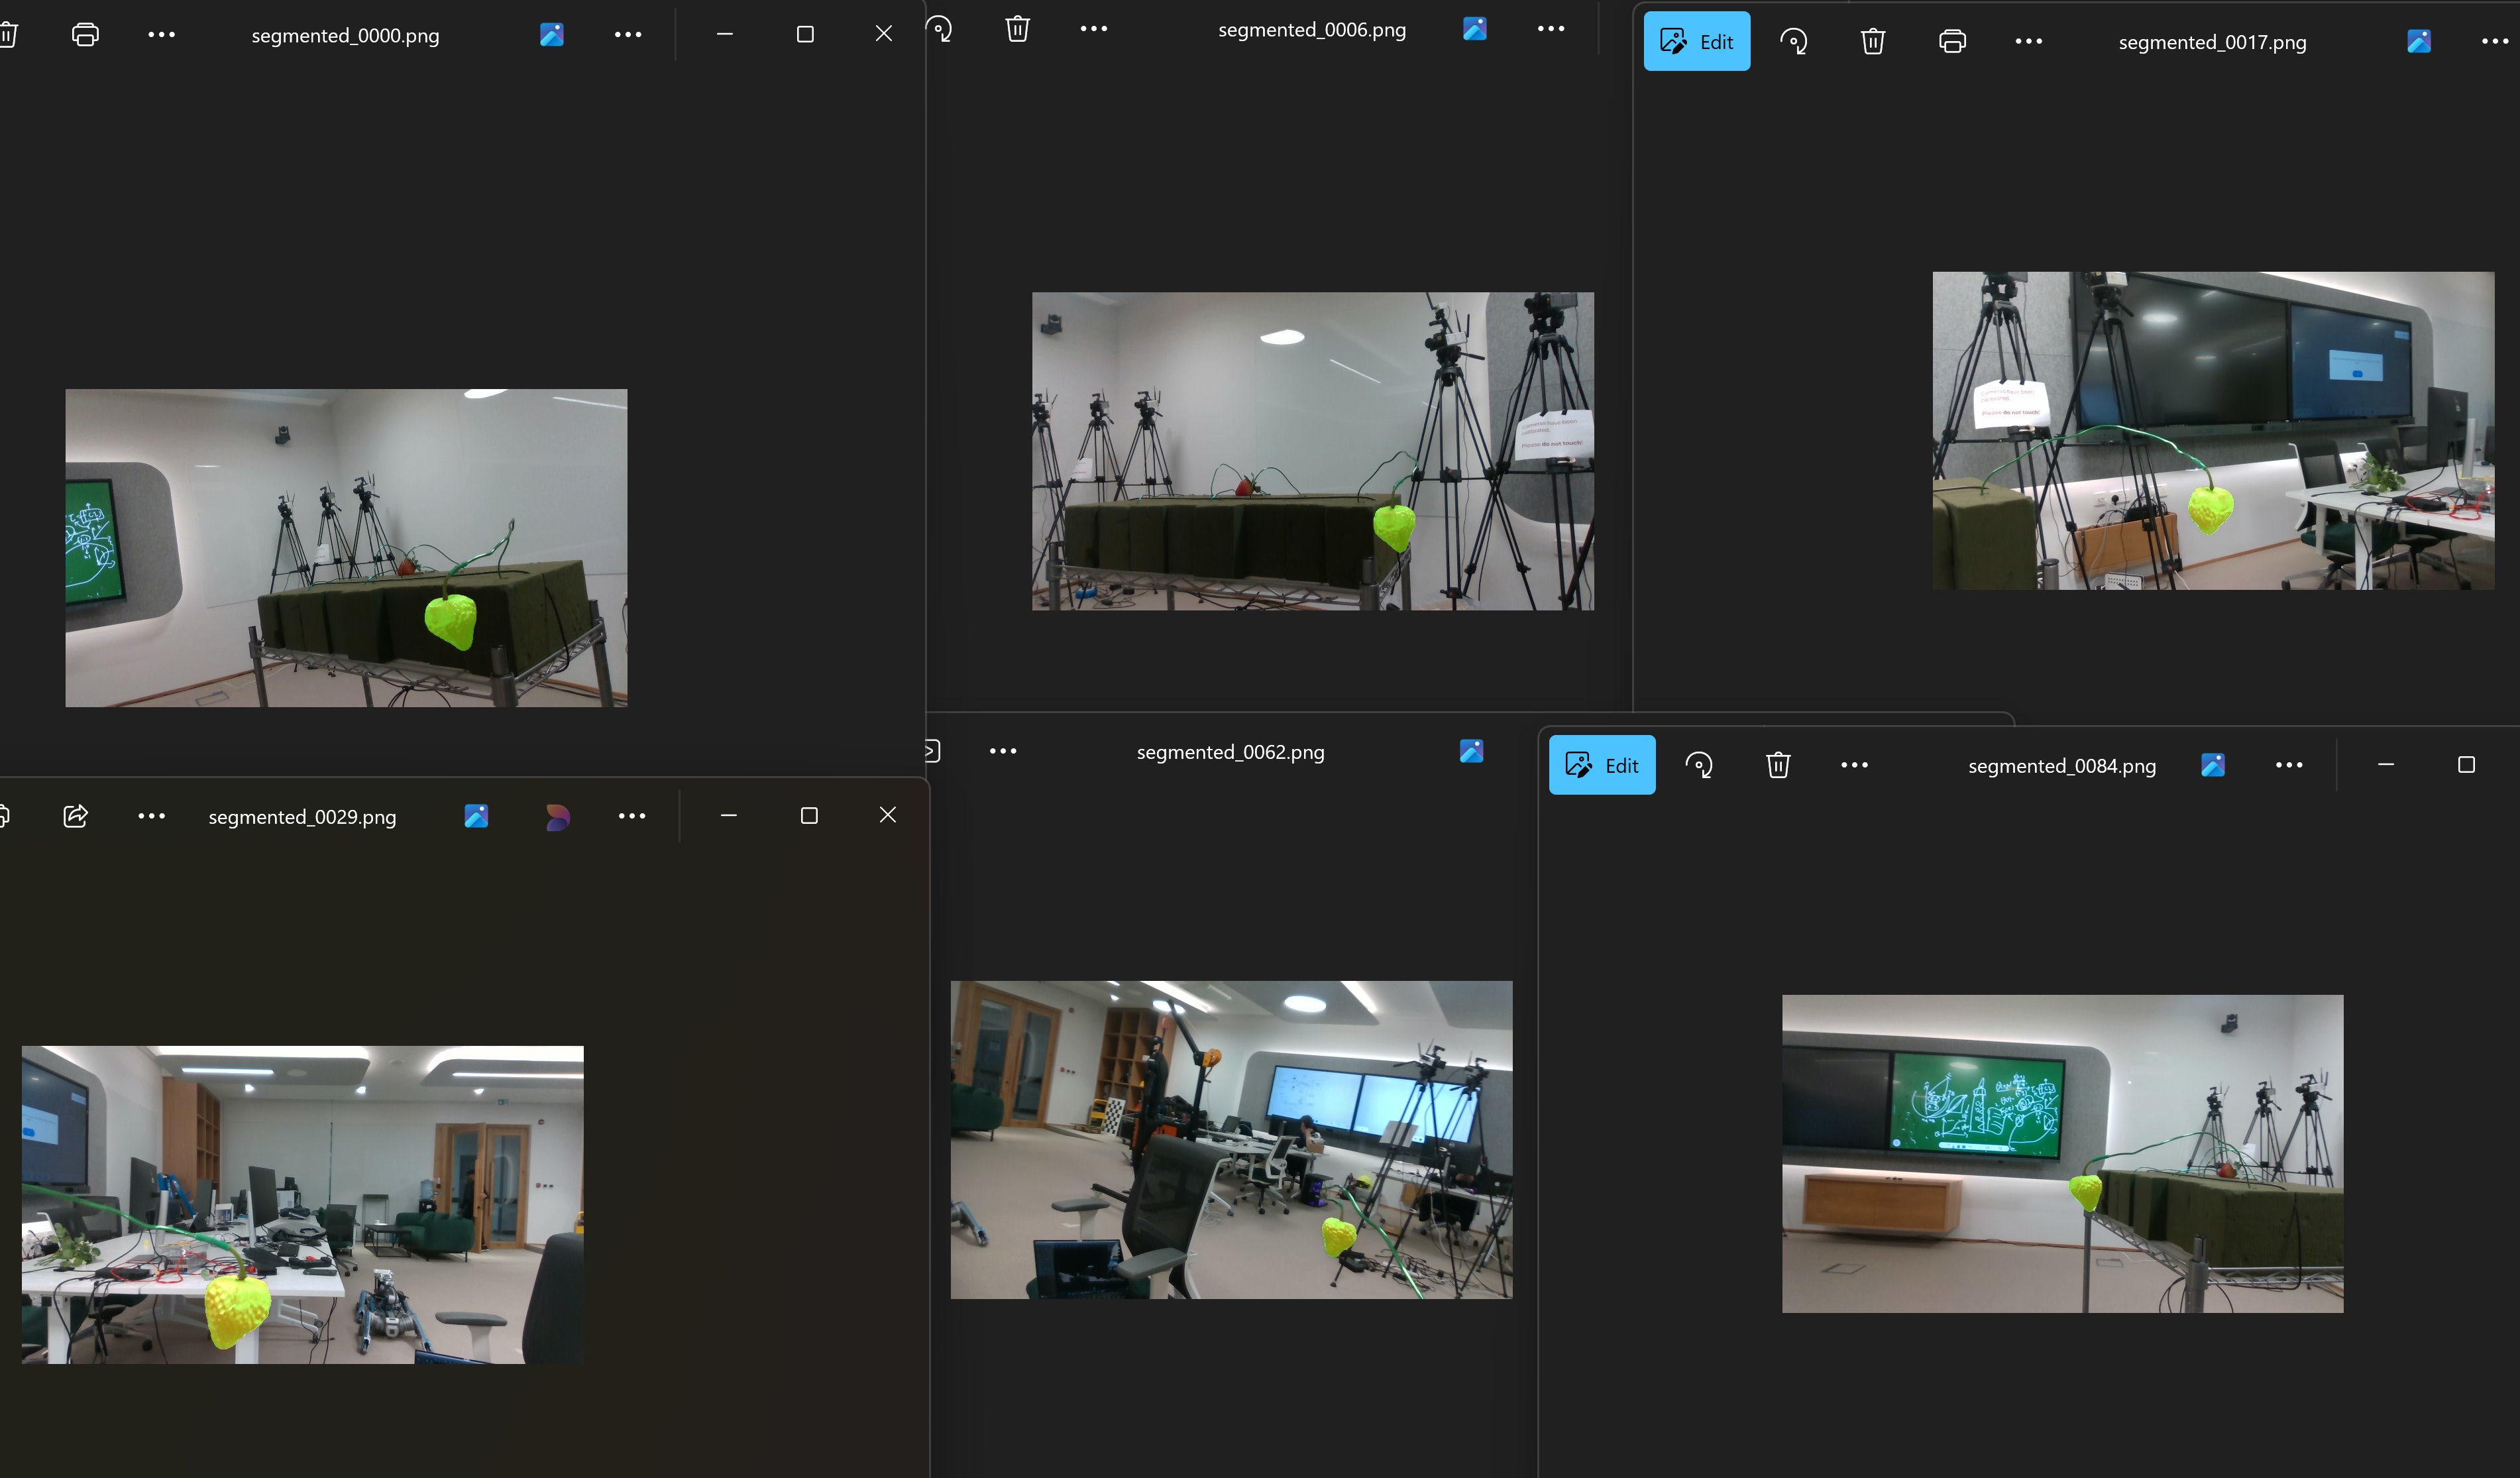